# Apresentação:

A ideia desse *notebook* é introduzir ao ferramental ao **Tensorflow**, uma biblioteca renomada no que se refere a *deep learning*. Aqui vamos trabalhar com algumas operações básicas e intermediárias da biblioteca de modo a começar-mos a nos familiarizar com a API.

**TensorFlow** é uma biblioteca de código aberto para computação numérica **baseada em grafos**. Foi desenvolvido pela equipe do *Google Brain*. Ele possui **APIs** de baixo e alto nível. Você pode usar o **TensorFlow** para realizar adição, multiplicação e diferenciação. Também é possível usá-lo para projetar e treinar modelos de *machine learning*.

**TensorFlow 2.0**
O **TensorFlow 2.0** trouxe mudanças substanciais. A execução ansiosa (*eager execution*) agora está habilitada por padrão, o que permite aos usuários escreverem um código mais simples e intuitivo. Além disso, a construção de modelos agora é centrada nas APIs de alto nível **Keras** e **Estimators**.

Documentações:

1. TensorFlow: https://www.tensorflow.org/api_docs
2. Keras: https://keras.io/api/

# Tensores:

A documentação do **TensorFlow**, assim como  [**pytorch**](https://github.com/Baldros/DeepLearning-libs/tree/main/Introduction%20to%20Deep%20Learning%20with%20PyTorch), descreve um tensor como 'uma generalização de vetores e matrizes para potencialmente dimensões mais altas'. Esse conceito nasce da $\small \text{álgebra linear}$, mas podemos simplificar um tensor como uma coleção de números, que está organizada em uma forma particular.

In [36]:
# Importando TensorFlow
import tensorflow as tf

In [37]:
# Tensor de ordem zero:
d0 = tf.ones((1,)); d0

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [38]:
# Tensor de ordem 1:
d1 = tf.ones((2,)); d1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [39]:
# Tensor de ordem 2:
d2 = tf.ones((2,2)); d2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [40]:
# Tensor de ordem 3:
d3 = tf.ones((2,2,2)); d3

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]], dtype=float32)>

**TensorFlow e Numpy**

Assim como o pytorch, o tensorflow também tem métodos para transformar um tensor num array numpy. No fundo, tem muito de numpy nessas bibliotecas de *deep learning*, inclusive por isso que alguns métodos tem o mesmo nome.

In [41]:
# Tensor para array:
np_tensor = d3.numpy()
print(type(d3),type(np_tensor))
print(np_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'numpy.ndarray'>
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


**Constantes**

Podemos criar tensores constantes, que são a categoria mais simples de tensor no TensorFlow. Um tensor constante não muda e não pode ser treinada. No entanto, ela pode ter qualquer dimensão. O nome pode enganar, mas não tem nada a ver com um escalar, continua sendo um tensor, mas que não se altera com o treinamento.

In [42]:
# Importando Classe do tensor constante
from tensorflow import constant

In [43]:
# Definindo A
a = constant(3,shape=[2,3]);a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 3, 3],
       [3, 3, 3]], dtype=int32)>

In [44]:
# Definindo B
b = constant([1,2,3,4], shape=[2,2]);b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

Algumas funções uteis.

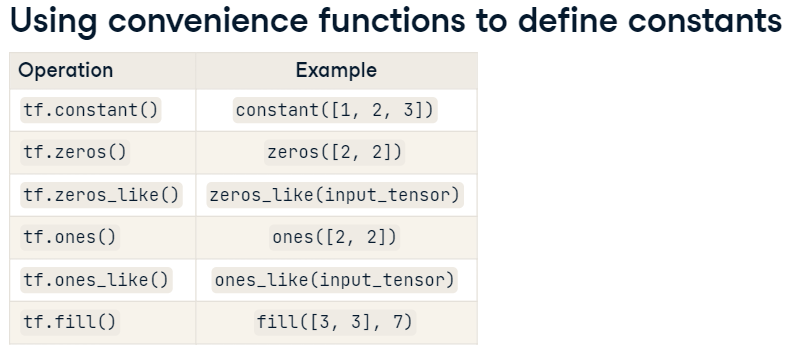

**Tensores Variáveis**

Diferente de um tensor constante, o valor de um tensor variável pode mudar durante a computação. O valor de uma variável é compartilhado, persistente e modificável. No entanto, seu tipo de dados e forma são fixos. Vamos dar uma olhada em como os tensores variáveis são construídas e usadas no TensorFlow.

In [45]:
# Definindo Tensor variável:
a0 = tf.Variable([1, 2, 3, 4, 5, 6], dtype=tf.float32)
a1 = tf.Variable([1, 2, 3, 4, 5, 6], dtype=tf.int16)

print(a0)
print(a1)

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(6,) dtype=int16, numpy=array([1, 2, 3, 4, 5, 6], dtype=int16)>


No código, primeiro definimos uma variável, `a0`, que é um tensor $\small unidimensional$ com $\small 6$ elementos. Podemos definir seu tipo de dados como um `float` de `32 bits` ou algo diferente, como um `int` de `16 bits`, como fizemos para `a1`.

In [46]:
# Definindo um tensor constante:
b = tf.constant(2, tf.float32);b

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [47]:
# Computando o produto:
c0 = tf.multiply(a0, b);c0

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 2.,  4.,  6.,  8., 10., 12.], dtype=float32)>

Em seguida, definimos uma constante, `b`. E definimos `c0` como o produto de `a0` e `b`. Note que certas operações TensorFlow, como `tf.multiply`, são sobrecarregadas, o que nos permite usar a expressão mais simples `a0*b`

In [48]:
# Computando produto:
prod = a0*b

# Checando informação:
c0.numpy() == prod.numpy()

array([ True,  True,  True,  True,  True,  True])

# Operações Básicas entre Tensores:

Como já vimos, o TensorFlow tem um modelo de computação que gira em torno do uso de grafos. Um grafo do TensorFlow contém arestas e nós, onde as arestas são tensores e os nós são operações.


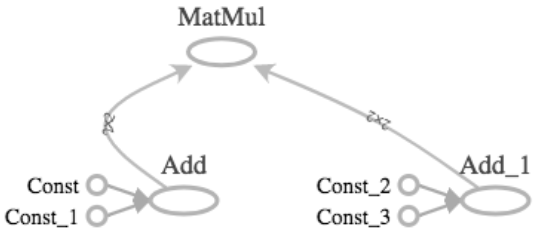

## Adição de Tensores

A operação de adição (*add*) realiza a adição elemento a elemento entre dois tensores. Cada par de tensores adicionados deve ter a mesma dimensão. Além disso, o operador de adição é sobrecarregado, o que significa que também podemos realizar adição usando o símbolo de mais (+).

In [49]:
# Importando elementos utilizados:
from tensorflow import constant, add

In [50]:
# Definindo tensores (de ordem zero):
a0 = constant([1])
b0 = constant([2])

# Definindo tensores (de primeira ordem):
a1 = constant([1,2])
b1 = constant([3,4])

# Definindo tensores (de segunda ordem):
a2 = constant([[1,2],[3,4]])
b2 = constant([[5,6],[7,8]])

In [51]:
# Realizando operação de soma pela função add():
c0 = add(a0,b0)
c1 = add(a1,b1)
c2 = add(a2,b2)

print(c0)
print(c1)
print(c2)

tf.Tensor([3], shape=(1,), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


## Multiplicação de Tensores:

Multiplicação de tensores dependes da definição de de multiplicação para cada ordem. Se estivermos, por exemplo, trabalhando tensores de segunda ordem, ou seja, matrizes, só vamos ter a multiplicação definida se $$\small A_{(2\times 3)}*B_{(3 \times 1)} = C_{(2\times 1)}$$

In [52]:
# Elementos utilizados
from tensorflow import ones, matmul, multiply

In [53]:
# Define Tensors
A0 = ones(1)
A31 = ones([3,1])
A34 = ones([3,4])
A43 = ones([4,3])

In [54]:
# Mutiplicação dos elementos pelo método de Hadamard:
B0 = multiply(A0,A0)
B31 = multiply(A31,A31)
B34 = multiply(A34,A34)
B43 = multiply(A43,A43)

print(B0)
print(B31)
print(B34)
print(B43)

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)


In [94]:
# Mutiplicação dos elementos:
try:
  B0 = matmul(A0,A0)
  print(B0)
except Exception as e:
  print(A0.shape,A0.shape,e.message[88:])

try:
  B31 = matmul(A31,A31)
  print(B31)
except Exception as e:
  print(A31.shape,A31.shape,e.message[88:])

try:
  B34 = matmul(A34,A34)
  print(B34)
except Exception as e:
  print(A34.shape,A34.shape,e.message[88:])

try:
  B43 = matmul(A43,A43)
  print(B43)
except Exception as e:
  print(A43.shape,A43.shape,e.message[88:])

(1,) (1,) In[0] and In[1] ndims must be == 2: 1 [Op:MatMul] name: 
(3, 1) (3, 1) Matrix size-incompatible: In[0]: [3,1], In[1]: [3,1] [Op:MatMul] name: 
(3, 4) (3, 4) Matrix size-incompatible: In[0]: [3,4], In[1]: [3,4] [Op:MatMul] name: 
(4, 3) (4, 3) Matrix size-incompatible: In[0]: [4,3], In[1]: [4,3] [Op:MatMul] name: 


**`tf.multiply` vs `tf.matmul`**

`tf.matmul` realiza a **multiplicação de matrizes clássica**, produto interno. É usada para a multiplicação de dois tensores, onde a multiplicação de matrizes é esperada, conforme as regras da álgebra linear. Isso significa que, dado um tensor A de forma $\small [m, n]$ e um tensor B de forma $\small[n, p]$, o resultado será um tensor de forma $\small[m, p]$.

`tf.multiply` realiza a **multiplicação elemento a elemento** ([Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))) de dois tensores. Isso significa que os dois tensores precisam ter a mesma forma, e cada elemento do tensor resultante é o produto dos elementos correspondentes dos tensores de entrada.

## Somando as dimensões do Tensor

Por fim, encerramos esta lição discutindo a soma sobre tensores, que é realizada usando o operador reduce sum. Isso pode ser usado para somar todas as dimensões de um tensor ou apenas uma.

In [55]:
# Importando operadores do TensorFlow
from tensorflow import ones, reduce_sum

In [57]:
# Definindo tensores
A = ones([2,3,4]);A

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [58]:
# Soma de todos as dimenções
B = reduce_sum(A);B

<tf.Tensor: shape=(), dtype=float32, numpy=24.0>

In [59]:
# Soma sobre cada dimensão
B0= reduce_sum(A,0)
B1= reduce_sum(A,1)
B2= reduce_sum(A,2)

print(B0)
print(B1)
print(B2)

tf.Tensor(
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[4. 4. 4.]
 [4. 4. 4.]], shape=(2, 3), dtype=float32)


# Operações Avançadas entre Tensores: